In [1]:
!pip install split-folders

In [2]:
#Create a file with name kaggle
! mkdir ~/.kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#install kaggle
! pip install kaggle

In [5]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download sachinkumarsaxena/kidney-bareilly-plus-srms-train-test

 99% 372M/374M [00:03<00:00, 139MB/s]
100% 374M/374M [00:03<00:00, 108MB/s]


In [7]:
! mkdir train

In [8]:
! unzip /content/kidney-bareilly-plus-srms-train-test.zip

Streaming output truncated to the last 5000 lines.
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/908.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/909.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/910.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/911.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/912.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/913.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/914.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/915.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/916.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/917.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/918.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/919.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/920.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST/921.jpg  
  inflating: BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST

! unzip /content/kidney-bareilly-plus-srms-train-test.zip

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/BAREILLY PLUS SRMS TRAIN TEST'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/475.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/1003.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/1103.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/998.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/1499.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/2332.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/487.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/614.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/1697.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/564.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/2334.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/2318.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/1005.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/1164.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL/605.jpg
/content/BAREILLY PLUS SRMS TRAIN TEST/T

In [10]:
os.listdir("/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN")

['NORMAL', 'TUMOR', 'STONE', 'CYST']

In [11]:
train_dir = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN"
test_dir = "/content/BAREILLY PLUS SRMS TRAIN TEST/TEST"
cyst = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST"
normal = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL"
tumor = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/TUMOR"
stone = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/STONE"

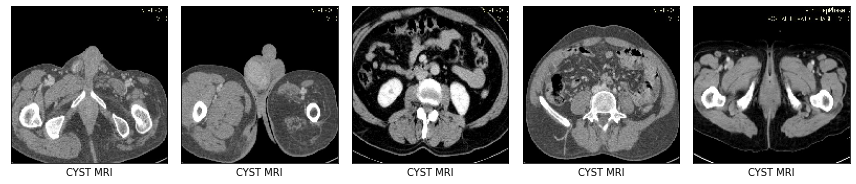

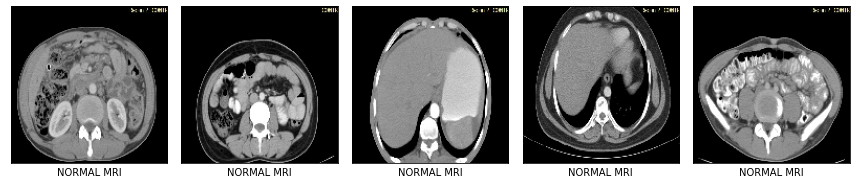

In [12]:
#Visualization of Glioma and Meningioma Tumour

plt.figure(figsize=(12,6))
gli_samp = random.sample(os.listdir(cyst),5)

for i,image in enumerate(gli_samp):
    path = os.path.join(cyst,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("CYST MRI")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

plt.figure(figsize=(12,6))
menin_samp = random.sample(os.listdir(normal),5)

for i,image in enumerate(menin_samp):
    path = os.path.join(normal,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("NORMAL MRI")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

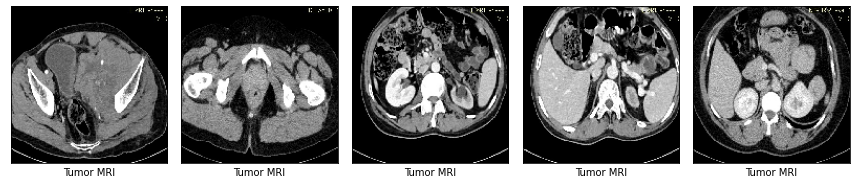

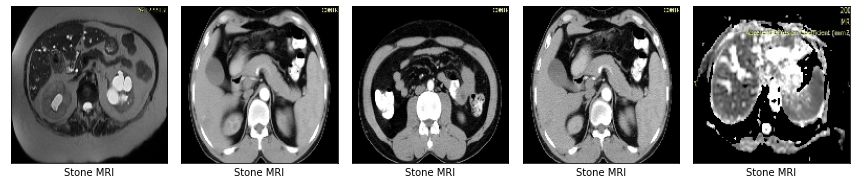

In [13]:
#Visualization of No Tumour and Pituitary Tumour

plt.figure(figsize=(12,6))
no_samp = random.sample(os.listdir(tumor),5)

for i,image in enumerate(no_samp):
    path = os.path.join(tumor,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Tumor MRI")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

plt.figure(figsize=(12,6))
pit_samp = random.sample(os.listdir(stone),5)

for i,image in enumerate(pit_samp):
    path = os.path.join(stone,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Stone MRI")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

In [14]:
#Feeding Training Data to X_train and y_train

train_dir = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN"
test_dir = "/content/BAREILLY PLUS SRMS TRAIN TEST/TEST"
train_cyst = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/CYST"
train_normal = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/NORMAL"
train_tumor = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/TUMOR"
train_stone = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN/STONE"

X_train = []
y_train = []

for i in tqdm(os.listdir(train_cyst)):
    path = os.path.join(train_cyst,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Cyst')
    
for i in tqdm(os.listdir(train_normal)):
    path = os.path.join(train_normal,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Normal')
    
for i in tqdm(os.listdir(train_tumor)):
    path = os.path.join(train_tumor,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Tumor')   
    
for i in tqdm(os.listdir(train_stone)):
    path = os.path.join(train_stone,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Stone')    

100%|██████████| 847/847 [00:02<00:00, 359.46it/s]


In [15]:
#Feeding Testing Data to X_train and y_train

train_dir = "/content/BAREILLY PLUS SRMS TRAIN TEST/TRAIN"
test_dir = "/content/BAREILLY PLUS SRMS TRAIN TEST/TEST"
test_cyst = "/content/BAREILLY PLUS SRMS TRAIN TEST/TEST/CYST"
test_normal = "/content/BAREILLY PLUS SRMS TRAIN TEST/TEST/NORMAL"
test_tumor = "/content/BAREILLY PLUS SRMS TRAIN TEST/TEST/TUMOR"
test_stone = "/content/BAREILLY PLUS SRMS TRAIN TEST/TEST/STONE"

X_test = []
y_test = []

for i in tqdm(os.listdir(test_cyst)):
    path = os.path.join(test_cyst,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Cyst')
    
for i in tqdm(os.listdir(test_normal)):
    path = os.path.join(test_normal,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Normal')
    

for i in tqdm(os.listdir(test_tumor)):
    path = os.path.join(test_tumor,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Tumor') 
    
for i in tqdm(os.listdir(test_stone)):
    path = os.path.join(test_stone,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Stone')    

100%|██████████| 110/110 [00:00<00:00, 349.12it/s]


 #  **Converting to array form**

In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape,y_train.shape

((6994, 224, 224, 3), (6994,))

In [17]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape,y_test.shape

((979, 224, 224, 3), (979,))

#  **Visualizing y_train and y_test count** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


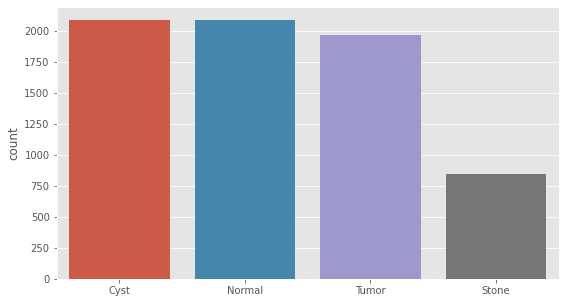

In [18]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y_train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


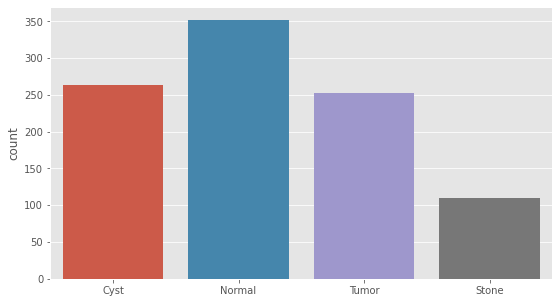

In [19]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y_test)
plt.show()

# **Applying Label Encoding**

In [20]:
y_train

array(['Cyst', 'Cyst', 'Cyst', ..., 'Stone', 'Stone', 'Stone'],
      dtype='<U6')

In [21]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)

In [22]:
y_train

array([0, 0, 0, ..., 2, 2, 2])

In [23]:
y_test

array(['Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
       'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst', 'Cyst',
      

In [24]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [25]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# **Getting Unique Counts**

In [26]:
unique,counts = np.unique(y_train,return_counts=True)
print(unique,counts)

[0 1 2 3] [2086 2090  847 1971]


In [27]:
unique1,counts1 = np.unique(y_test,return_counts=True)
print(unique1,counts1)

[0 1 2 3] [264 352 110 253]


# **Changing target to Category**

In [28]:
y_train = to_categorical(y_train)#num_classes = 4
y_train.shape

(6994, 4)

In [29]:
y_test = to_categorical(y_test)#num_classes = 4
y_test.shape

(979, 4)

In [30]:
img_size=224
train_datagen = ImageDataGenerator(rotation_range=30,height_shift_range=0.2,
                                  zoom_range = 0.3,horizontal_flip=True)#rescale=(1./255),
test_datagen = ImageDataGenerator()#rescale=(1./255)

train_gen = train_datagen.flow_from_directory(directory = train_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)
test_gen = test_datagen.flow_from_directory(directory = test_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)

Found 6994 images belonging to 4 classes.
Found 979 images belonging to 4 classes.


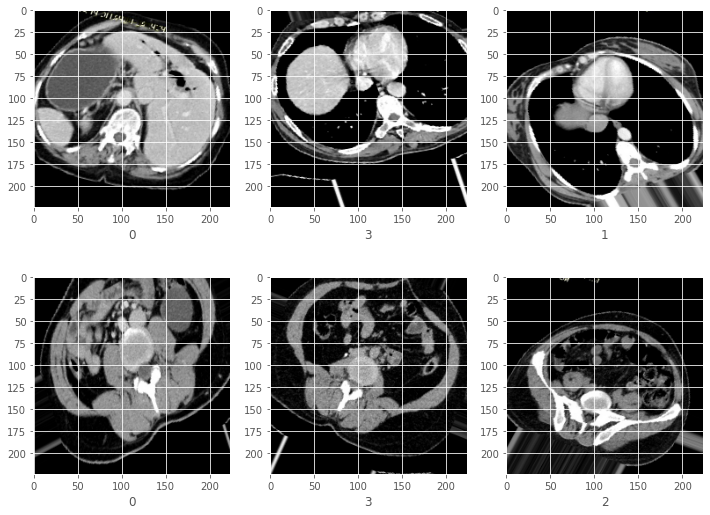

In [31]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_gen)
plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

# **Modelling**

**Model 1: EfficientNetB0**

In [32]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import EfficientNetB0
effnet = EfficientNetB0(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

16719872/16705208 [==============================] - 0s 0us/step


In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = effnet.input,outputs = model)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

# model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

# checkpoint = ModelCheckpoint("xcep.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
# earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
#                               patience = 2, min_delta = 0.001, 
#                               mode = 'auto', verbose = 1)

In [35]:
history = model.fit(X_train,y_train,epochs=15,validation_data = (X_test,y_test),verbose=1,
                              callbacks=[checkpoint,reduce_lr])

Epoch 1/15
219/219 [==============================] - ETA: 0s - loss: 0.3205 - accuracy: 0.9002
Epoch 1: val_accuracy improved from -inf to 0.82431, saving model to effnet.h5
219/219 [==============================] - 156s 606ms/step - loss: 0.3205 - accuracy: 0.9002 - val_loss: 0.5183 - val_accuracy: 0.8243 - lr: 1.0000e-04
Epoch 2/15
219/219 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9969
Epoch 2: val_accuracy improved from 0.82431 to 0.88662, saving model to effnet.h5
219/219 [==============================] - 128s 585ms/step - loss: 0.0221 - accuracy: 0.9969 - val_loss: 0.3705 - val_accuracy: 0.8866 - lr: 1.0000e-04
Epoch 3/15
219/219 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9993
Epoch 3: val_accuracy improved from 0.88662 to 0.89173, saving model to effnet.h5
219/219 [==============================] - 127s 581ms/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.3464 - val_accuracy: 0.8917 - lr: 1.0000e-04
Epoch 4/15
21

In [36]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

31/31 [==============================] - 4s 128ms/step - loss: 0.3026 - accuracy: 0.9602
Validation Loss: 0.30263447761535645
Validation Accuracy: 0.960163414478302


# **Evaluation**

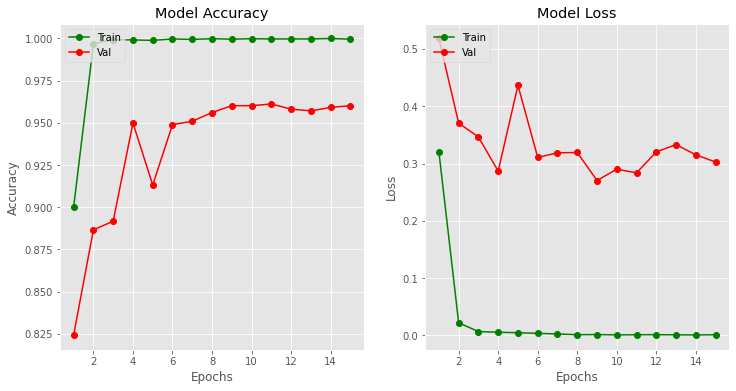

In [37]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [38]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [266 324 110 279]


In [40]:
y_test_new = np.argmax(y_test,axis=1)

# **Classification Report**

In [41]:
#Efficient Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       264
           1       1.00      0.92      0.96       352
           2       1.00      1.00      1.00       110
           3       0.91      1.00      0.95       253

    accuracy                           0.96       979
   macro avg       0.96      0.97      0.97       979
weighted avg       0.96      0.96      0.96       979



# **Confusion Matrix**

Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

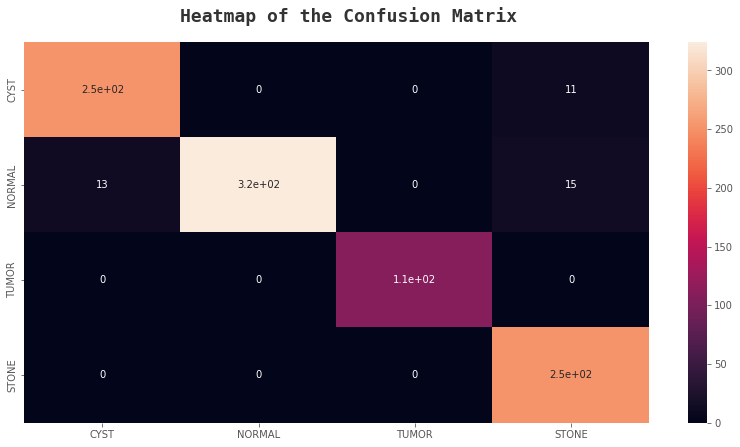

In [42]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
labels=['CYST','NORMAL','TUMOR','STONE']
sns.heatmap(confusion_matrix(y_test_new,y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

**end of Model 1**

# **Model Testing**

**Model 2: Xception**

In [43]:
from tensorflow.keras.applications import Xception
xcep=Xception(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))


83697664/83683744 [==============================] - 1s 0us/step


In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

model = xcep.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = xcep.input,outputs = model)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("xcep.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train,epochs=15,validation_data = (X_test,y_test),verbose=1,
                              callbacks=[checkpoint,reduce_lr])

Epoch 1/15
219/219 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9524
Epoch 1: val_accuracy improved from -inf to 0.94076, saving model to xcep.h5
219/219 [==============================] - 324s 1s/step - loss: 0.1532 - accuracy: 0.9524 - val_loss: 0.2830 - val_accuracy: 0.9408 - lr: 1.0000e-04
Epoch 2/15
219/219 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9997
Epoch 2: val_accuracy did not improve from 0.94076
219/219 [==============================] - 308s 1s/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 0.4283 - val_accuracy: 0.8825 - lr: 1.0000e-04
Epoch 3/15
219/219 [==============================] - ETA: 0s - loss: 6.0421e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.94076

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
219/219 [==============================] - 309s 1s/step - loss: 6.0421e-04 - accuracy: 1.0000 - val_loss: 0.3196 - val_accuracy: 0.8989 - lr: 1.0000e-04


In [ ]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

31/31 [==============================] - 12s 372ms/step - loss: 0.3944 - accuracy: 0.9234
Validation Loss: 0.3943769931793213
Validation Accuracy: 0.9233912229537964


# **Evaluation**

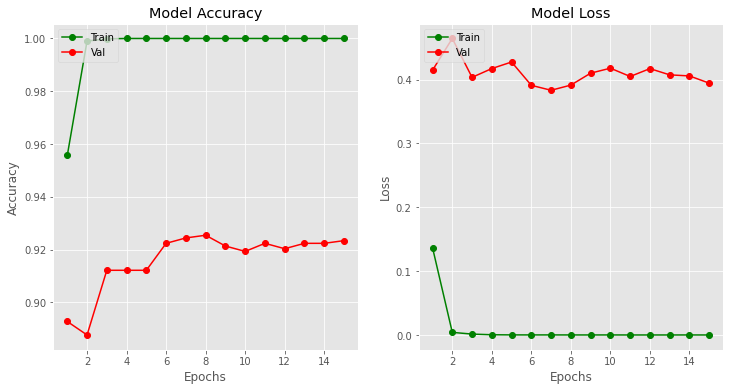

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [277 295 132 275]


In [ ]:
y_test_new = np.argmax(y_test,axis=1)

# **Classification Report**

In [ ]:
#Efficient Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       264
           1       1.00      0.84      0.91       352
           2       0.83      0.99      0.90       110
           3       0.92      1.00      0.96       253

    accuracy                           0.92       979
   macro avg       0.91      0.94      0.92       979
weighted avg       0.93      0.92      0.92       979



# **Confusion Matrix**

Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

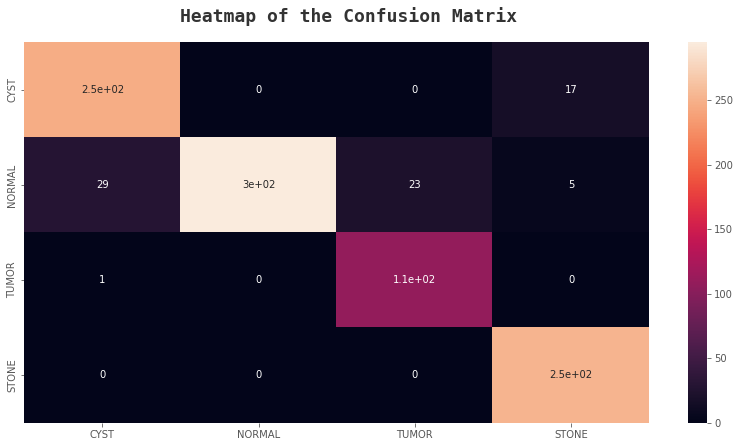

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
labels=['CYST','NORMAL','TUMOR','STONE']
sns.heatmap(confusion_matrix(y_test_new,y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

# **Model Testing**

**Model 3: VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
vgg16=VGG16(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

model = vgg16.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = vgg16.input,outputs = model)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train,epochs=15,validation_data = (X_test,y_test),verbose=1,
                              callbacks=[checkpoint,reduce_lr])

Epoch 1/15
219/219 [==============================] - ETA: 0s - loss: 0.9251 - accuracy: 0.6413
Epoch 1: val_accuracy improved from -inf to 0.76302, saving model to vgg16.h5
219/219 [==============================] - 252s 1s/step - loss: 0.9251 - accuracy: 0.6413 - val_loss: 0.9055 - val_accuracy: 0.7630 - lr: 1.0000e-04
Epoch 2/15
219/219 [==============================] - ETA: 0s - loss: 0.1351 - accuracy: 0.9578
Epoch 2: val_accuracy improved from 0.76302 to 0.82942, saving model to vgg16.h5
219/219 [==============================] - 232s 1s/step - loss: 0.1351 - accuracy: 0.9578 - val_loss: 0.9385 - val_accuracy: 0.8294 - lr: 1.0000e-04
Epoch 3/15
219/219 [==============================] - ETA: 0s - loss: 0.0455 - accuracy: 0.9876
Epoch 3: val_accuracy did not improve from 0.82942
219/219 [==============================] - 232s 1s/step - loss: 0.0455 - accuracy: 0.9876 - val_loss: 1.3782 - val_accuracy: 0.8182 - lr: 1.0000e-04
Epoch 4/15
219/219 [==============================] - E

In [ ]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

31/31 [==============================] - 10s 337ms/step - loss: 2.3939 - accuracy: 0.8693
Validation Loss: 2.3939404487609863
Validation Accuracy: 0.8692543506622314


# **Evaluation**

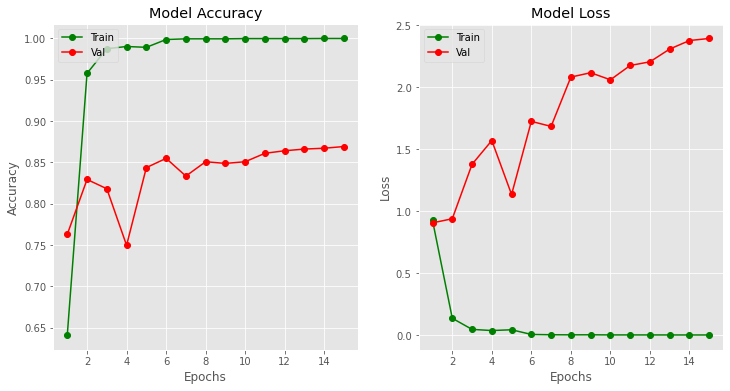

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [277 326 204 172]


In [ ]:
y_test_new = np.argmax(y_test,axis=1)

# **Classification Report**

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       264
           1       0.99      0.92      0.96       352
           2       0.52      0.97      0.68       110
           3       0.91      0.62      0.73       253

    accuracy                           0.87       979
   macro avg       0.84      0.88      0.84       979
weighted avg       0.91      0.87      0.87       979



# **Confusion Matrix**

Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

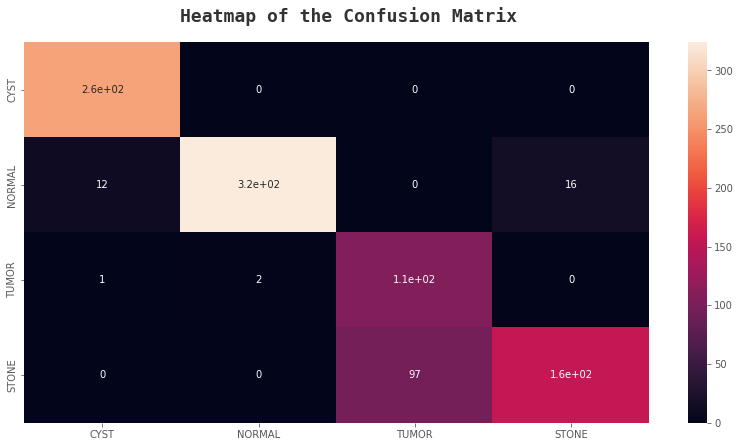

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
labels=['CYST','NORMAL','TUMOR','STONE']
sns.heatmap(confusion_matrix(y_test_new,y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

# **Model Testing**

**Model 4: ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
resnet50=ResNet50(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

model = resnet50.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = resnet50.input,outputs = model)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("resnet50.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train,epochs=15,validation_data = (X_test,y_test),verbose=1,
                              callbacks=[checkpoint,reduce_lr])

Epoch 1/15
219/219 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.9738
Epoch 1: val_accuracy improved from -inf to 0.90398, saving model to resnet50.h5
219/219 [==============================] - 202s 873ms/step - loss: 0.0802 - accuracy: 0.9738 - val_loss: 0.2518 - val_accuracy: 0.9040 - lr: 1.0000e-04
Epoch 2/15
219/219 [==============================] - ETA: 0s - loss: 5.3394e-04 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.90398
219/219 [==============================] - 185s 844ms/step - loss: 5.3394e-04 - accuracy: 1.0000 - val_loss: 0.3483 - val_accuracy: 0.8815 - lr: 1.0000e-04
Epoch 3/15
219/219 [==============================] - ETA: 0s - loss: 2.0336e-04 - accuracy: 1.0000
Epoch 3: val_accuracy improved from 0.90398 to 0.90807, saving model to resnet50.h5
219/219 [==============================] - 186s 850ms/step - loss: 2.0336e-04 - accuracy: 1.0000 - val_loss: 0.3408 - val_accuracy: 0.9081 - lr: 1.0000e-04
Epoch 4/15
219/219 [====

In [ ]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

31/31 [==============================] - 8s 247ms/step - loss: 0.3463 - accuracy: 0.9295
Validation Loss: 0.3462672829627991
Validation Accuracy: 0.9295198917388916


# **Evaluation**

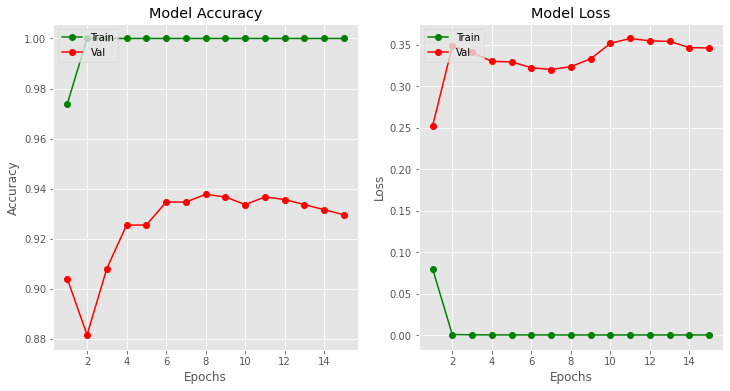

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [275 324 130 250]


In [ ]:
y_test_new = np.argmax(y_test,axis=1)

# **Classification Report**

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       264
           1       1.00      0.92      0.96       352
           2       0.83      0.98      0.90       110
           3       0.93      0.92      0.92       253

    accuracy                           0.93       979
   macro avg       0.91      0.94      0.92       979
weighted avg       0.93      0.93      0.93       979



# **Confusion Matrix**

Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

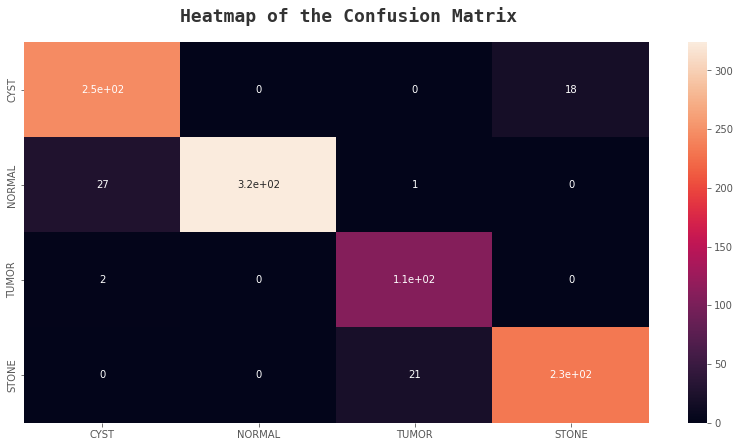

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
labels=['CYST','NORMAL','TUMOR','STONE']
sns.heatmap(confusion_matrix(y_test_new,y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

# **Model Testing**

**Model 5: MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNet
mobilnet50=MobileNet(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

model = vgg16.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = vgg16.input,outputs = model)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("xcep.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train,epochs=15,validation_data = (X_test,y_test),verbose=1,
                              callbacks=[checkpoint,reduce_lr])

Epoch 1/15
219/219 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9534
Epoch 1: val_accuracy improved from -inf to 0.91420, saving model to xcep.h5
219/219 [==============================] - 306s 1s/step - loss: 0.1408 - accuracy: 0.9534 - val_loss: 0.4137 - val_accuracy: 0.9142 - lr: 1.0000e-04
Epoch 2/15
219/219 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.91420 to 0.92850, saving model to xcep.h5
219/219 [==============================] - 285s 1s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3454 - val_accuracy: 0.9285 - lr: 1.0000e-04
Epoch 3/15
219/219 [==============================] - ETA: 0s - loss: 7.2775e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.92850
219/219 [==============================] - 284s 1s/step - loss: 7.2775e-04 - accuracy: 1.0000 - val_loss: 0.4191 - val_accuracy: 0.9193 - lr: 1.0000e-04
Epoch 4/15
219/219 [=============================

In [ ]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

31/31 [==============================] - 9s 294ms/step - loss: 0.4663 - accuracy: 0.9234
Validation Loss: 0.46632832288742065
Validation Accuracy: 0.9233912229537964


In [ ]:
# Xception Model
# Validation Loss: 0.46632832288742065
# Validation Accuracy: 0.9233912229537964

In [ ]:
#Efficient Model
# Validation Loss: 0.3107436001300812
# Validation Accuracy: 0.9468845725059509

# **Evaluation**

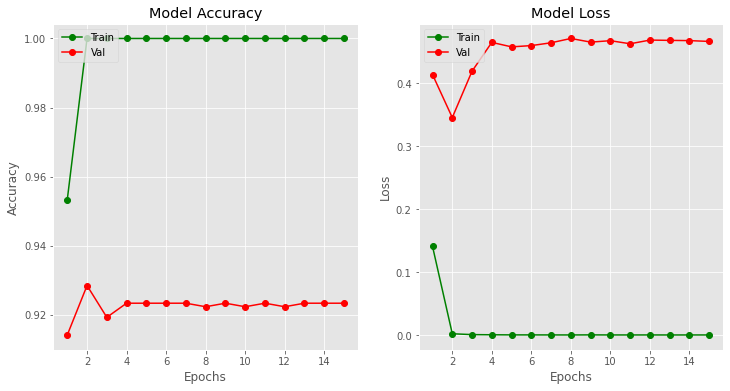

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [247 306 134 292]


In [ ]:
y_test_new = np.argmax(y_test,axis=1)

# **Classification Report**

In [ ]:
#Efficient Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       264
           1       1.00      0.92      0.96       352
           2       0.88      1.00      0.94       110
           3       0.91      1.00      0.95       253

    accuracy                           0.95       979
   macro avg       0.94      0.96      0.94       979
weighted avg       0.95      0.95      0.95       979



In [ ]:
#Xception Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       264
           1       1.00      0.87      0.93       352
           2       0.82      1.00      0.90       110
           3       0.87      1.00      0.93       253

    accuracy                           0.92       979
   macro avg       0.91      0.94      0.92       979
weighted avg       0.93      0.92      0.92       979



In [ ]:
# auc_roc=clf_report.classification_report(y_test_new,y_pred)
# auc_roc

# **Confusion Matrix**

In [ ]:
# from sklearn.metrics import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

# cm = confusion_matrix(y_test_new,y_pred)
# plot_confusion_matrix(conf_mat = cm,figsize=(8,7), class_names = ['CYST','NORMAL','TUMOR','STONE'],show_normed=True);

Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

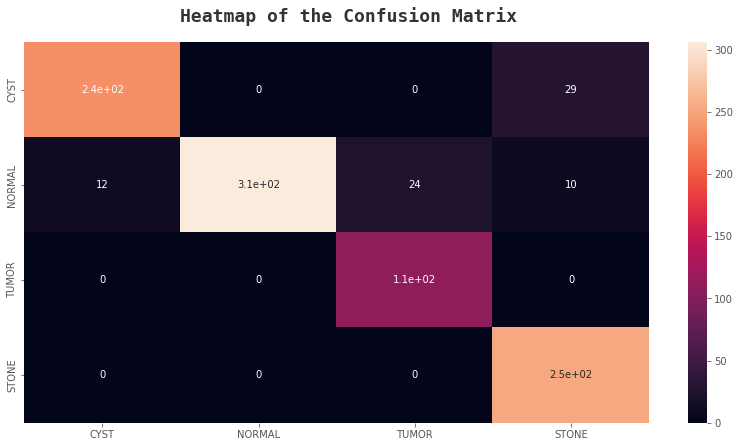

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
labels=['CYST','NORMAL','TUMOR','STONE']
sns.heatmap(confusion_matrix(y_test_new,y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
roc(y_test_new,y_pred)
# auc_roc

NameError: ignored

# **Model Testing**

**Model 6: InceptionV3**

In [ ]:
from tensorflow.keras.applications import InceptionV3
inceptionv3=InceptionV3(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

model = vgg16.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = vgg16.input,outputs = model)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("xcep.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train,epochs=15,validation_data = (X_test,y_test),verbose=1,
                              callbacks=[checkpoint,reduce_lr])

Epoch 1/15
219/219 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9534
Epoch 1: val_accuracy improved from -inf to 0.91420, saving model to xcep.h5
219/219 [==============================] - 306s 1s/step - loss: 0.1408 - accuracy: 0.9534 - val_loss: 0.4137 - val_accuracy: 0.9142 - lr: 1.0000e-04
Epoch 2/15
219/219 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.91420 to 0.92850, saving model to xcep.h5
219/219 [==============================] - 285s 1s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3454 - val_accuracy: 0.9285 - lr: 1.0000e-04
Epoch 3/15
219/219 [==============================] - ETA: 0s - loss: 7.2775e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.92850
219/219 [==============================] - 284s 1s/step - loss: 7.2775e-04 - accuracy: 1.0000 - val_loss: 0.4191 - val_accuracy: 0.9193 - lr: 1.0000e-04
Epoch 4/15
219/219 [=============================

In [ ]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

31/31 [==============================] - 9s 294ms/step - loss: 0.4663 - accuracy: 0.9234
Validation Loss: 0.46632832288742065
Validation Accuracy: 0.9233912229537964


In [ ]:
# Xception Model
# Validation Loss: 0.46632832288742065
# Validation Accuracy: 0.9233912229537964

In [ ]:
#Efficient Model
# Validation Loss: 0.3107436001300812
# Validation Accuracy: 0.9468845725059509

# **Evaluation**

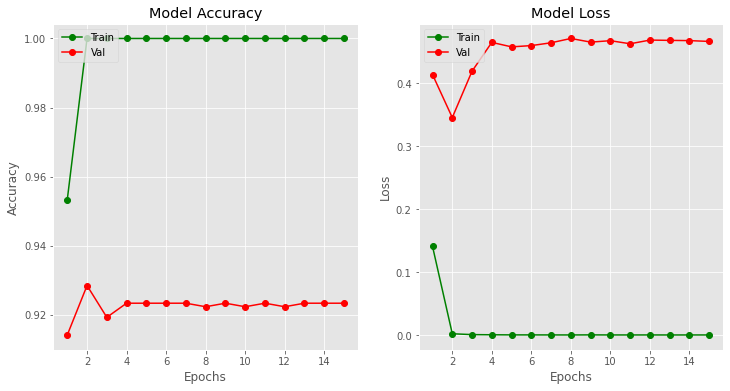

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [247 306 134 292]


In [ ]:
y_test_new = np.argmax(y_test,axis=1)

# **Classification Report**

In [ ]:
#Efficient Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       264
           1       1.00      0.92      0.96       352
           2       0.88      1.00      0.94       110
           3       0.91      1.00      0.95       253

    accuracy                           0.95       979
   macro avg       0.94      0.96      0.94       979
weighted avg       0.95      0.95      0.95       979



In [ ]:
#Xception Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       264
           1       1.00      0.87      0.93       352
           2       0.82      1.00      0.90       110
           3       0.87      1.00      0.93       253

    accuracy                           0.92       979
   macro avg       0.91      0.94      0.92       979
weighted avg       0.93      0.92      0.92       979



In [ ]:
# auc_roc=clf_report.classification_report(y_test_new,y_pred)
# auc_roc

# **Confusion Matrix**

In [ ]:
# from sklearn.metrics import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

# cm = confusion_matrix(y_test_new,y_pred)
# plot_confusion_matrix(conf_mat = cm,figsize=(8,7), class_names = ['CYST','NORMAL','TUMOR','STONE'],show_normed=True);

Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

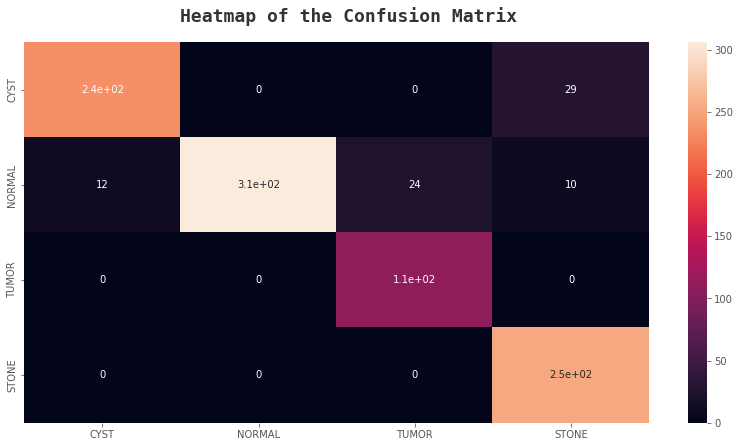

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
labels=['CYST','NORMAL','TUMOR','STONE']
sns.heatmap(confusion_matrix(y_test_new,y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
roc(y_test_new,y_pred)
# auc_roc

NameError: ignored

# **Model Testing**

**Model 7: DenseNet121**

In [ ]:
from tensorflow.keras.applications import DenseNet121
densenet121=DenseNet121(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

model = vgg16.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = vgg16.input,outputs = model)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("xcep.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train,epochs=15,validation_data = (X_test,y_test),verbose=1,
                              callbacks=[checkpoint,reduce_lr])

Epoch 1/15
219/219 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9534
Epoch 1: val_accuracy improved from -inf to 0.91420, saving model to xcep.h5
219/219 [==============================] - 306s 1s/step - loss: 0.1408 - accuracy: 0.9534 - val_loss: 0.4137 - val_accuracy: 0.9142 - lr: 1.0000e-04
Epoch 2/15
219/219 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.91420 to 0.92850, saving model to xcep.h5
219/219 [==============================] - 285s 1s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3454 - val_accuracy: 0.9285 - lr: 1.0000e-04
Epoch 3/15
219/219 [==============================] - ETA: 0s - loss: 7.2775e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.92850
219/219 [==============================] - 284s 1s/step - loss: 7.2775e-04 - accuracy: 1.0000 - val_loss: 0.4191 - val_accuracy: 0.9193 - lr: 1.0000e-04
Epoch 4/15
219/219 [=============================

In [ ]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

31/31 [==============================] - 9s 294ms/step - loss: 0.4663 - accuracy: 0.9234
Validation Loss: 0.46632832288742065
Validation Accuracy: 0.9233912229537964


In [ ]:
# Xception Model
# Validation Loss: 0.46632832288742065
# Validation Accuracy: 0.9233912229537964

In [ ]:
#Efficient Model
# Validation Loss: 0.3107436001300812
# Validation Accuracy: 0.9468845725059509

# **Evaluation**

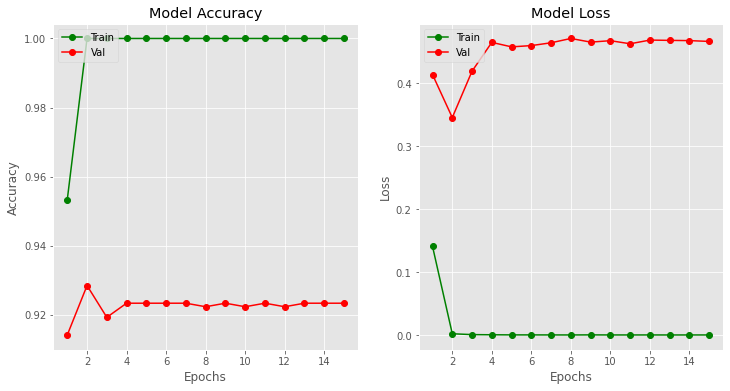

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [247 306 134 292]


In [ ]:
y_test_new = np.argmax(y_test,axis=1)

# **Classification Report**

In [ ]:
#Efficient Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       264
           1       1.00      0.92      0.96       352
           2       0.88      1.00      0.94       110
           3       0.91      1.00      0.95       253

    accuracy                           0.95       979
   macro avg       0.94      0.96      0.94       979
weighted avg       0.95      0.95      0.95       979



In [ ]:
#Xception Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       264
           1       1.00      0.87      0.93       352
           2       0.82      1.00      0.90       110
           3       0.87      1.00      0.93       253

    accuracy                           0.92       979
   macro avg       0.91      0.94      0.92       979
weighted avg       0.93      0.92      0.92       979



In [ ]:
# auc_roc=clf_report.classification_report(y_test_new,y_pred)
# auc_roc

# **Confusion Matrix**

In [ ]:
# from sklearn.metrics import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

# cm = confusion_matrix(y_test_new,y_pred)
# plot_confusion_matrix(conf_mat = cm,figsize=(8,7), class_names = ['CYST','NORMAL','TUMOR','STONE'],show_normed=True);

Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

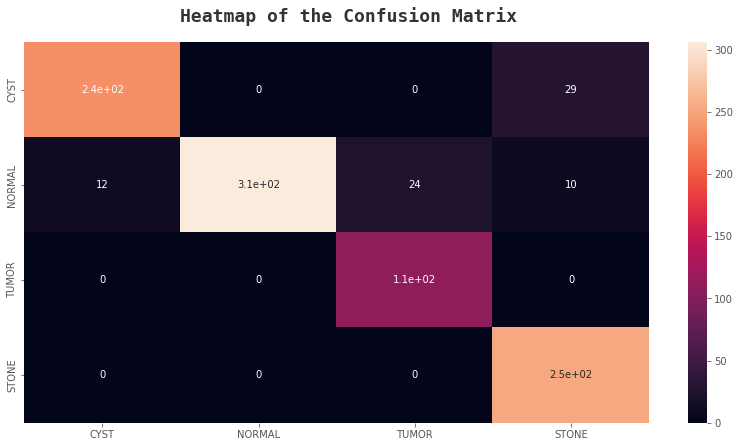

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
labels=['CYST','NORMAL','TUMOR','STONE']
sns.heatmap(confusion_matrix(y_test_new,y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
roc(y_test_new,y_pred)
# auc_roc

NameError: ignored

# **Model Testing**

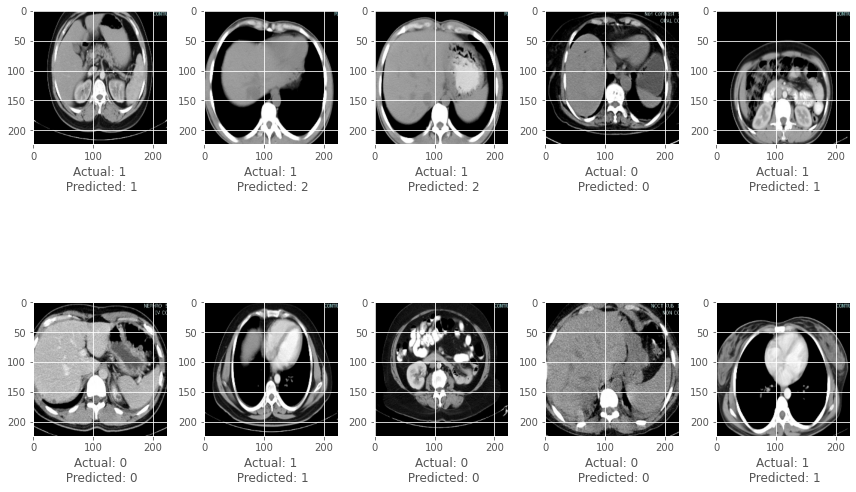

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = random.choice(range(len(X_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

In [ ]:
#Extra

**Model 2: Xception**

In [ ]:
from tensorflow.keras.applications import Xception
xcep=Xception(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))


83697664/83683744 [==============================] - 1s 0us/step


**Model 3:**

In [ ]:
from tensorflow.keras.applications import VGG16
vgg16=VGG16(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))


**Model 4: ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
resnet50=ResNet50(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

94781440/94765736 [==============================] - 1s 0us/step


**Model 5: MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNet
mobilnet50=MobileNet(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

17235968/17225924 [==============================] - 0s 0us/step


**Model 6: InceptionV3**

In [ ]:
from tensorflow.keras.applications import InceptionV3
inceptionv3=InceptionV3(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

87924736/87910968 [==============================] - 1s 0us/step


**Model 7: DenseNet121**

In [ ]:
from tensorflow.keras.applications import DenseNet121
densenet121=DenseNet121(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

model = vgg16.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = vgg16.input,outputs = model)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("xcep.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train,epochs=15,validation_data = (X_test,y_test),verbose=1,
                              callbacks=[checkpoint,reduce_lr])

Epoch 1/15
219/219 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9534
Epoch 1: val_accuracy improved from -inf to 0.91420, saving model to xcep.h5
219/219 [==============================] - 306s 1s/step - loss: 0.1408 - accuracy: 0.9534 - val_loss: 0.4137 - val_accuracy: 0.9142 - lr: 1.0000e-04
Epoch 2/15
219/219 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.91420 to 0.92850, saving model to xcep.h5
219/219 [==============================] - 285s 1s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3454 - val_accuracy: 0.9285 - lr: 1.0000e-04
Epoch 3/15
219/219 [==============================] - ETA: 0s - loss: 7.2775e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.92850
219/219 [==============================] - 284s 1s/step - loss: 7.2775e-04 - accuracy: 1.0000 - val_loss: 0.4191 - val_accuracy: 0.9193 - lr: 1.0000e-04
Epoch 4/15
219/219 [=============================

In [ ]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

31/31 [==============================] - 9s 294ms/step - loss: 0.4663 - accuracy: 0.9234
Validation Loss: 0.46632832288742065
Validation Accuracy: 0.9233912229537964


In [ ]:
# Xception Model
# Validation Loss: 0.46632832288742065
# Validation Accuracy: 0.9233912229537964

In [ ]:
#Efficient Model
# Validation Loss: 0.3107436001300812
# Validation Accuracy: 0.9468845725059509

# **Evaluation**

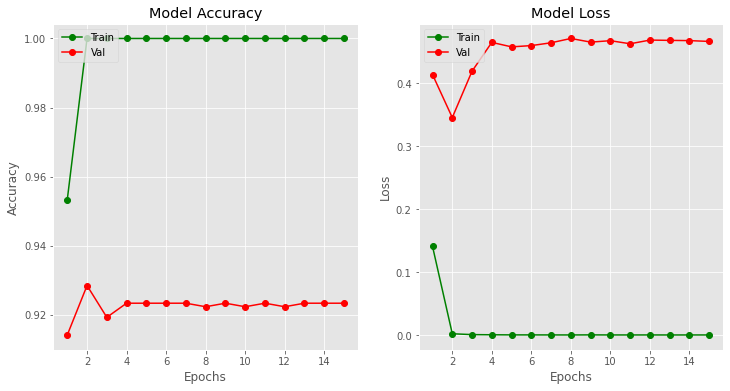

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [247 306 134 292]


In [ ]:
y_test_new = np.argmax(y_test,axis=1)

# **Classification Report**

In [ ]:
#Efficient Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       264
           1       1.00      0.92      0.96       352
           2       0.88      1.00      0.94       110
           3       0.91      1.00      0.95       253

    accuracy                           0.95       979
   macro avg       0.94      0.96      0.94       979
weighted avg       0.95      0.95      0.95       979



In [ ]:
#Xception Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       264
           1       1.00      0.87      0.93       352
           2       0.82      1.00      0.90       110
           3       0.87      1.00      0.93       253

    accuracy                           0.92       979
   macro avg       0.91      0.94      0.92       979
weighted avg       0.93      0.92      0.92       979



In [ ]:
# auc_roc=clf_report.classification_report(y_test_new,y_pred)
# auc_roc

# **Confusion Matrix**

In [ ]:
# from sklearn.metrics import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

# cm = confusion_matrix(y_test_new,y_pred)
# plot_confusion_matrix(conf_mat = cm,figsize=(8,7), class_names = ['CYST','NORMAL','TUMOR','STONE'],show_normed=True);

Text(0.28, 0.92, 'Heatmap of the Confusion Matrix')

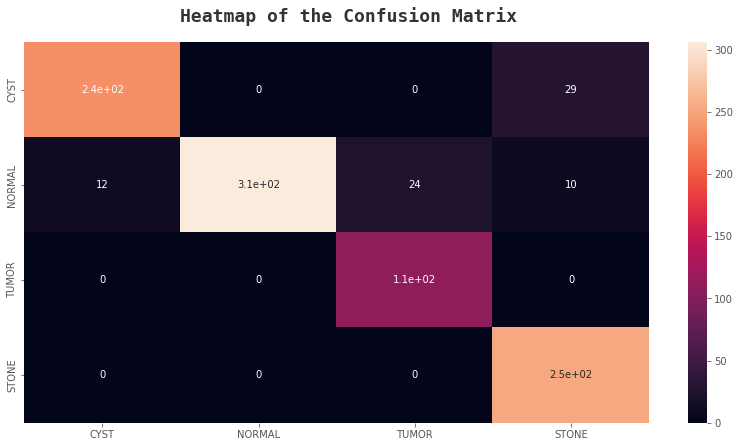

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
labels=['CYST','NORMAL','TUMOR','STONE']
sns.heatmap(confusion_matrix(y_test_new,y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
roc(y_test_new,y_pred)
# auc_roc

NameError: ignored

# **Model Testing**

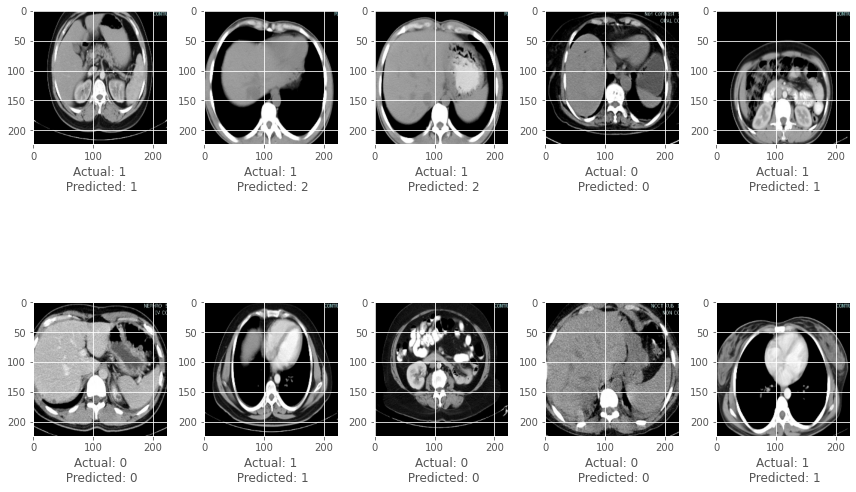

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = random.choice(range(len(X_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()